# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 20, 11:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import NumPy, Matplotlib. If anything else is needed you can import this yourself.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Exercise 1
N.B.1. you are to implement the methods yourself.

N.B.2. Tentative distribution of points is 2+1+2+2+2 points (plus 1 point makes 10).

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 

## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Plot the absolute approximation error for different values of $k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

In [40]:
def composite_trapezoid(func, a, b, m):
    h = (b-a)/m
    est_integral = np.sum([h*func(a+h*i) for i in range(m)])
    est_integral -= (h*func(a) + h*func(b))/2 # the first and final indices contribute only half
    return est_integral

def f(x):
    """Function to estimate the integral for."""
    return x**-3

def F(x):
    """Primitive of the function above, to recover the true integral."""
    return -(1/2)*x**-2

In [84]:
a = 1/10
b = 100
ks = np.linspace(10, 21, 100)
ms = np.unique([int(2**ks[i]) for i in range(len(ks))])
errors = []
true_integral = F(b) - F(a)

for i in range(len(ms)):
    estimated_integral = composite_trapezoid(func=f, a=a, b=b, m=ms[i])
    error = abs(estimated_integral - true_integral)
    errors.append(error)
    if error < 10**-3: # terminate the computations if the error is below the desired upper bound
        ms = ms[:i+1] # use only the ms up to and including the last one
        print(r"The first m for which the error is below 10^-3 is: ", ms[-1])
        break

The first m for which the error is below 10^-3 is:  165140


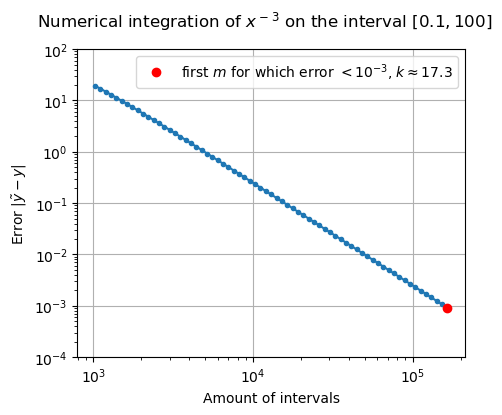

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ms, errors, "o-", markersize=3)
if np.min(errors) < 10**-3:
    plt.plot(ms[-1], errors[-1], "o", color="red", label=r"first $m$ for which error $<10^{-3}$" + rf", $k\approx{round(np.log2(ms[-1]), 1)}$")
ax.set_ylim(1e-4, 1e2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Amount of intervals")
ax.set_ylabel(r"Error $|\tilde{y}-y|$")
ax.grid()
fig.suptitle(fr"Num. integration of $x^-$$^3$ on the interval $[{a}, {b}]$")
ax.legend(loc="upper right")

As can be seen in the plot above, the first tested $k$ for which the absolute error is smaller than $10^{-3}$ is at $k\approx 17.3$, in which case $m=165140$ (see output cell above). For computational efficiency the computations are terminated once the allowed error is reached.

The plot above shows that the error appears to decrease in the form of a power law (linear in log,log-space). The slow convergence towards smaller values is an effect of the shape of the original function: $f=x^{-3}$. The power law form of the function makes that the size of the approximated integrals in the subintervals of size $h$ very a lot over the entire interval $[a,b]$. At the very start of the interval, the integral takes huge values since $f(1/10)=(1/10)^{-3}=1000$, while at the final part of the interval the integral takes on much smaller values since $f(100)=(100)^{-3}=10^{-6}$. An equispaced sampling of the $x$-axis results in very large errors, and a more suitable approach in this case would be to have a higher density of sampling points at the start of the interval.

As a verification of our hypothesis, the same computation is repeated over a shifted interval $[\frac{2}{10}, 100+\frac{1}{10}]$ below. As can be seen, even such a small shift reduces the amount of intervals needed to acquire the same accuracy by a factor 4.

In [89]:
a_shifted = a + a
b_shifted = b + a
ks = np.linspace(10, 21, 100)
ms_shifted = np.unique([int(2**ks[i]) for i in range(len(ks))])
errors_shifted = []
true_integral_shifted = F(b_shifted) - F(a_shifted)

for i in range(len(ms_shifted)):
    estimated_integral = composite_trapezoid(func=f, a=a_shifted, b=b_shifted, m=ms_shifted[i])
    error = abs(estimated_integral - true_integral_shifted)
    errors_shifted.append(error)
    if error < 10**-3: # terminate the computations if the error is below the desired upper bound
        ms_shifted = ms_shifted[:i+1] # use only the ms up to and including the last one
        print(r"The first m for which the error is below 10^-3 is: ", ms_shifted[-1])
        break

The first m for which the error is below 10^-3 is:  41285


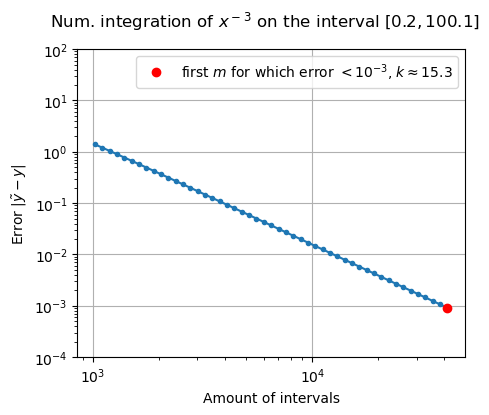

In [99]:
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ms_shifted, errors_shifted, "o-", markersize=3)
if np.min(errors_shifted) < 10**-3:
    plt.plot(ms_shifted[-1], errors_shifted[-1], "o", color="red", label=r"first $m$ for which error $<10^{-3}$" + rf", $k\approx{round(np.log2(ms_shifted[-1]), 1)}$")
ax.set_ylim(1e-4, 1e2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Amount of intervals")
ax.set_ylabel(r"Error $|\tilde{y}-y|$")
ax.grid()
fig.suptitle(fr"Num. integration of $x^-$$^3$ on the interval $[{a_shifted}, {b_shifted}]$")
ax.legend(loc="upper right")

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$I_1(f,a,b) = T(f,a,b,1)$$
$$I_2(f,a,b) = T(f,a,b,2).$$
Show, based on the precise error estimates for the trapezoid rule from the book/lecture that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).

## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

In [ ]:
def composite_trapezoid_recursive(func, a, b, tol=1e-3, C=0.5):
    print(f"entering recursive function with a={a}, b={b}, tol={tol}")
    h = b-a
    ms = [1, 2]
    Is = []
    est_integral = 0
    for m in ms:
        I = np.sum([(h*func(a+i*h/m)/2 + h*func(a+(i+1)*h/m)/2) for i in range(m)])
        Is.append(I)
    E2 = C*(Is[0]-Is[1])
    if E2 > tol:
        est_integral += composite_trapezoid_recursive(func, a, (b+a)/2, tol=tol / 2)
        est_integral += composite_trapezoid_recursive(func, (b+a)/2, b, tol=tol / 2)
    else:
        est_integral = Is[1]
    # I1 = (h*func(a) + h*func(b))/2 # the first and final indices contribute only half
    # I2 = np.sum([(h*func(a+i*h/2)/2 + h*func(a+(i+1)*h/2)) for i in range(2)])
    return est_integral

In [106]:
a = 1/10
b = 100
ks = np.linspace(10, 21, 100)
# ms = np.unique([int(2**ks[i]) for i in range(len(ks))])
errors = []
true_integral = F(b) - F(a)

# for i in range(len(ms)):
estimated_integral = composite_trapezoid_recursive(func=f, a=a, b=b, tol=1e-3, C=0.5)
error = abs(estimated_integral - true_integral)
# errors.append(error)
print(error)
    # if error < 10**-3: # terminate the computations if the error is below the desired upper bound
    #     ms = ms[:i+1] # use only the ms up to and including the last one
    #     print(r"The first m for which the error is below 10^-3 is: ", ms[-1])
    #     break

entering recursive function with a=0.1, b=100, tol=0.001
-0.0003984035938628949
49900.00089675719


## (d)

Modify the code of (c) so that the number of function evaluations is counted. Optimize your implementation such that no unnecessary function evaluations are performed.

Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable.)


## (e)
In the course of executing the recursive procedure, some subintervals are refined (split into two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Devise an alternative, non-recursive algorithm that addresses this issue and should to lead a more efficient integral computation. Describe your approach and algorithm in about 5 to 10 sentences (bullet points).
